# Proyek Akhir: Menyelesaikan Permasalahan institusi pendidikan

- Nama: Nurul alam
- Email: iyungalam5@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

### Menyiapkan data yang akan diguankan

In [34]:
education_df= pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", sep=";")

education_df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


## Data Understanding

In [35]:
education_df.shape

(4424, 37)



> Sel ini menampilkan jumlah baris dan kolom dalam DataFrame education_df. Ini membantu kita memahami ukuran dataset.



In [36]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i



> Sel ini memberikan ringkasan informasi tentang DataFrame, termasuk jumlah entri non-null di setiap kolom dan tipe data setiap kolom. Ini berguna untuk mengidentifikasi kolom yang mungkin memiliki nilai yang hilang atau tipe data yang tidak sesuai.



In [37]:
# Mengecek apakah ada data yang Missing value
print(education_df.isnull().values.any())
print(education_df.isna().sum())

False
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                           



> Sel ini memeriksa keberadaan missing values dalam DataFrame. Baris pertama mencetak True jika ada missing value, dan False jika tidak ada. Baris kedua mencetak jumlah missing values per kolom. Output menunjukkan tidak ada missing value.



In [38]:
#mengecek data yang duplicate
education_df.duplicated().sum()

np.int64(0)



>  Sel ini menghitung jumlah baris duplikat dalam DataFrame. Output 0 menunjukkan tidak ada data yang duplikat.



In [39]:
education_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000




>  Sel ini menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Status'. Ini menunjukkan distribusi target variabel sebelum filtering.



## Data Preparation / Preprocessing

In [40]:
education_df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794




> Sel ini menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Status'. Ini menunjukkan distribusi target variabel sebelum filtering.



In [41]:
education_df = education_df[education_df.Status!='Enrolled']



> Sel ini memfilter DataFrame untuk menghapus semua baris di mana kolom 'Status' memiliki nilai 'Enrolled'. Ini dilakukan karena fokus analisis mungkin pada siswa yang telah menyelesaikan atau keluar dari program.



In [42]:
education_df = education_df[education_df.Status!='Enrolled']
print("\nUnique values in 'Daytime_evening_attendance' after filtering 'Enrolled':")
print(education_df['Daytime_evening_attendance'].unique())


Unique values in 'Daytime_evening_attendance' after filtering 'Enrolled':
[1 0]




> Sel ini mengulangi filtering untuk menghapus status 'Enrolled' (baris pertama redundan jika sel sebelumnya sudah dijalankan). Baris kedua mencetak nilai unik dari kolom 'Daytime_evening_attendance' setelah filtering untuk memverifikasi hasilnya.





> Baris ini menghapus semua data dengan 'Status' 'Enrolled'



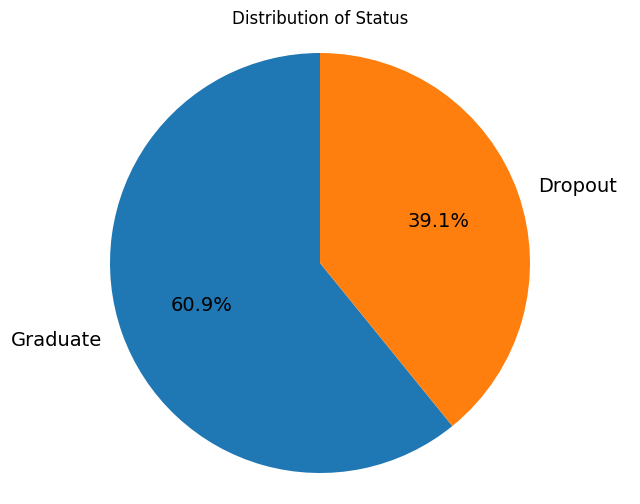

In [43]:
status_counts = education_df['Status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribution of Status')
plt.axis('equal')
plt.show()



> Sel ini membuat diagram lingkaran untuk memvisualisasikan distribusi kelas 'Dropout' dan 'Graduate' setelah menghapus 'Enrolled'. Ini membantu memahami proporsi siswa yang keluar dan yang lulus.



In [44]:
# Mengubah kolom 'Status' menjadi numerik
education_df['Status']=education_df['Status'].map({'Dropout':0,'Graduate':1})



> Sel ini mengubah nilai kategorikal 'Dropout' dan 'Graduate' dalam kolom 'Status' menjadi nilai numerik (0 dan 1). Ini diperlukan untuk pemodelan machine learning.



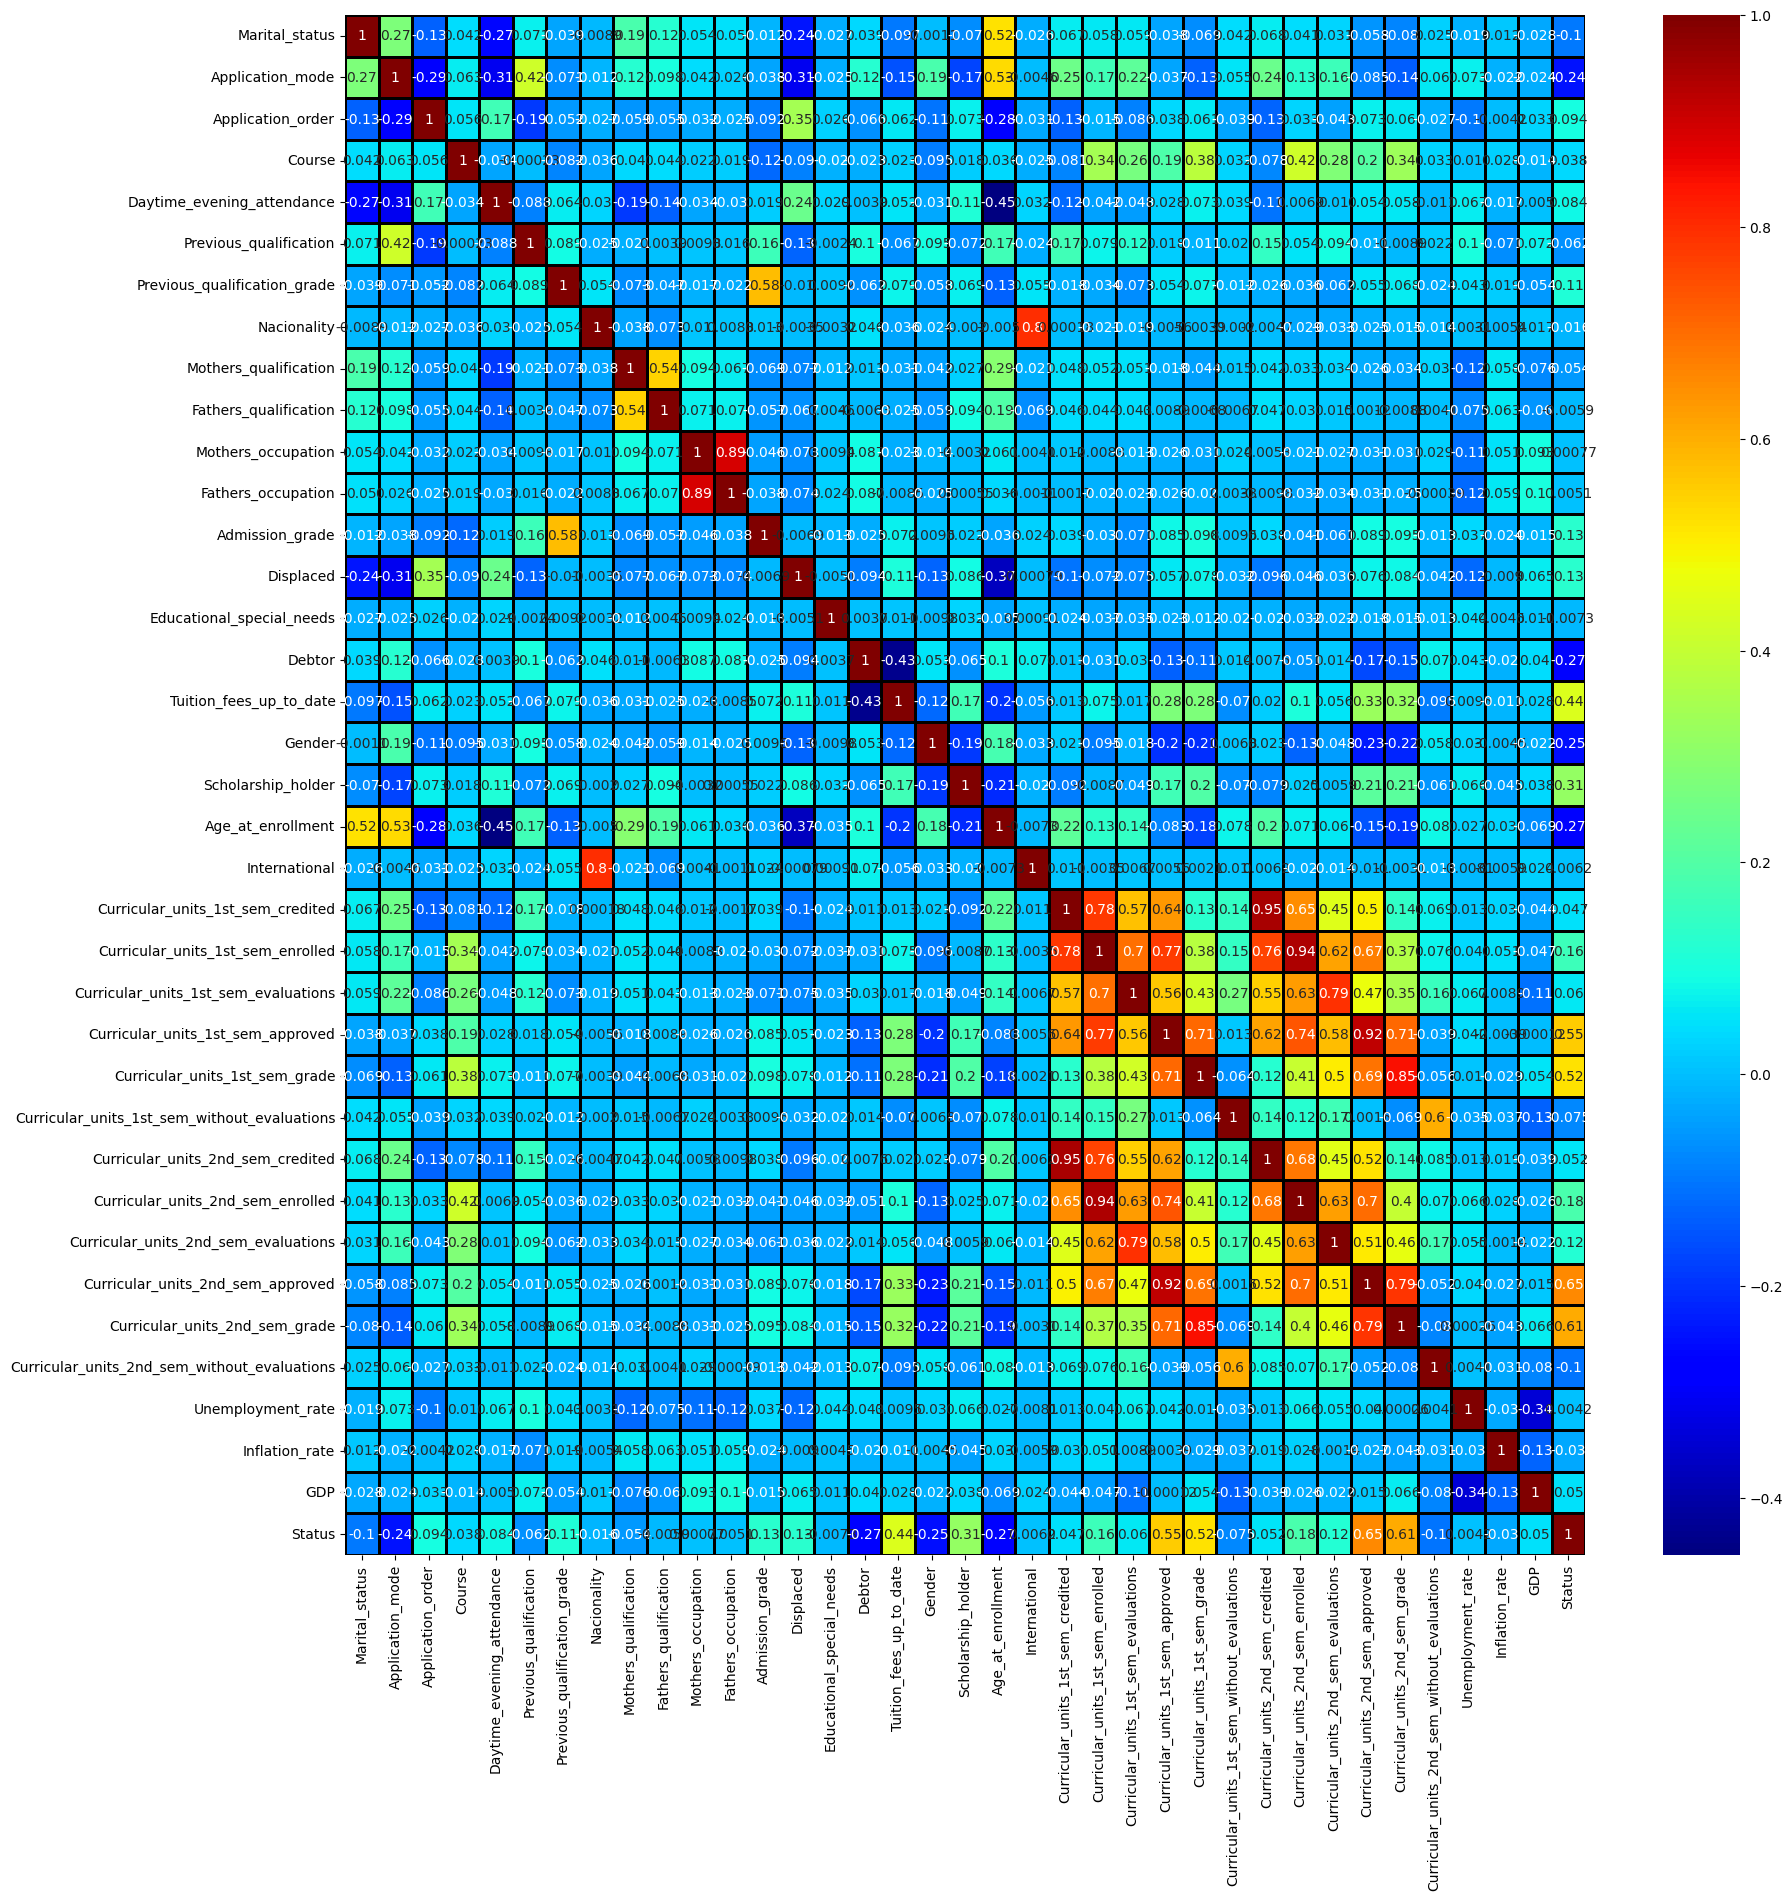

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(education_df.corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()



> Sel ini menghasilkan heatmap korelasi antar kolom numerik dalam DataFrame. Nilai anotasi menunjukkan koefisien korelasi. Heatmap membantu mengidentifikasi hubungan linier antara fitur-fitur.



In [46]:
education_df.corr()['Status']

,Status
Marital_status,-0.100479
Application_mode,-0.244507
Application_order,0.094355
Course,0.038135
Daytime_evening_attendance,0.084496
Previous_qualification,-0.062323
Previous_qualification_grade,0.109464
Nacionality,-0.015516
Mothers_qualification,-0.053989
Fathers_qualification,-0.005865




> Sel ini menghitung koefisien korelasi antara setiap kolom numerik dan kolom target 'Status'. Ini menunjukkan seberapa kuat dan dalam arah mana setiap fitur numerik berkorelasi dengan Status (Graduate/Dropout).





> Data yang memiliki korelasi negatif tidak digunakan dalam model



In [47]:
columns_to_drop = [
    'Marital_status','Age_at_enrollment','Application_mode','Application_order',
    'Course','Previous_qualification','Nacionality','Mothers_qualification',
    'Fathers_qualification','Mothers_occupation','Fathers_occupation',
    'Educational_special_needs','International','Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_without_evaluations','Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_without_evaluations','Unemployment_rate','Inflation_rate','GDP'
]

education_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)




> Sel ini menghapus kolom-kolom yang telah diidentifikasi memiliki korelasi rendah (atau negatif) dengan kolom target 'Status'. Menghapus fitur yang tidak relevan dapat membantu meningkatkan kinerja model dan mengurangi kompleksitas. errors='ignore' mencegah kesalahan jika kolom tidak ditemukan.



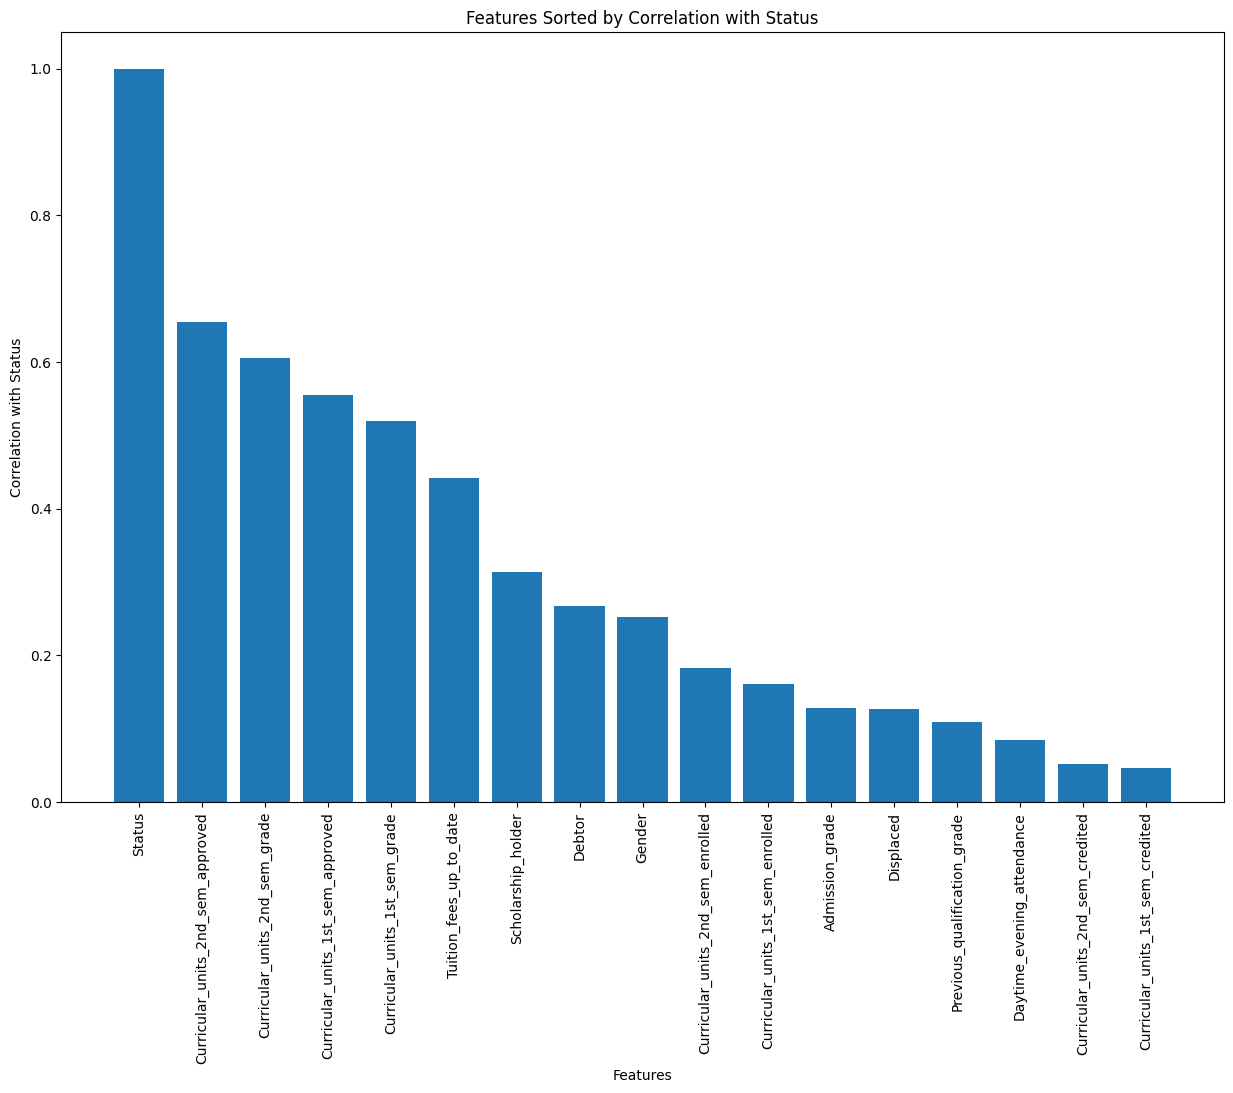

In [48]:
correl = education_df.corr()['Status']
sorted_corr = correl.abs().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(sorted_corr.index, sorted_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Status')
plt.title('Features Sorted by Correlation with Status')
plt.xticks(rotation=90)
plt.show()



> Sel ini menghitung korelasi absolut dari fitur yang tersisa dengan 'Status', mengurutkannya, dan kemudian memvisualisasikannya menggunakan bar plot. Ini menunjukkan fitur mana yang paling berkorelasi dengan Status setelah penghapusan fitur yang tidak relevan.



In [49]:
correl.head()

,Status
Daytime_evening_attendance,0.084496
Previous_qualification_grade,0.109464
Admission_grade,0.128058
Displaced,0.126113
Debtor,-0.267207




>  Sel ini menampilkan lima nilai korelasi teratas (positif atau negatif) dengan kolom 'Status'.





> mengubah ke dalam type string



In [50]:
education_df['Gender'] = education_df['Gender'].replace({0: 'Male', 1: 'Female'})
education_df['Displaced'] = education_df['Displaced'].replace({0: 'No', 1: 'Yes'})
education_df['Debtor'] = education_df['Debtor'].replace({0: 'No', 1: 'Yes'})
education_df['Scholarship_holder'] = education_df['Scholarship_holder'].replace({0: 'No', 1: 'Yes'})
education_df['Tuition_fees_up_to_date'] = education_df['Tuition_fees_up_to_date'].replace({0: 'No', 1: 'Yes'})
education_df['Daytime_evening_attendance'] = education_df['Daytime_evening_attendance'].replace({0: 'Evening', 1: 'Daytime'})
education_df['Status'] = education_df['Status'].replace({0: 'Dropout', 1: 'Graduate'})

# Optional: Memastikan tipe data adalah string setelah penggantian (jika diperlukan secara eksplisit)
education_df['Gender'] = education_df['Gender'].astype(str)
education_df['Displaced'] = education_df['Displaced'].astype(str)
education_df['Debtor'] = education_df['Debtor'].astype(str)
education_df['Scholarship_holder'] = education_df['Scholarship_holder'].astype(str)
education_df['Tuition_fees_up_to_date'] = education_df['Tuition_fees_up_to_date'].astype(str)
education_df['Daytime_evening_attendance'] = education_df['Daytime_evening_attendance'].astype(str)
education_df['Status'] = education_df['Status'].astype(str)



> Sel ini mengembalikan beberapa kolom kategorikal yang sebelumnya telah diubah menjadi numerik kembali ke representasi string aslinya ('Male'/'Female', 'Yes'/'No', 'Evening'/'Daytime', 'Dropout'/'Graduate'). Ini dilakukan untuk tujuan visualisasi dan interpretasi sebelum encoding ulang untuk pemodelan.



In [51]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daytime_evening_attendance         3630 non-null   object 
 1   Previous_qualification_grade       3630 non-null   float64
 2   Admission_grade                    3630 non-null   float64
 3   Displaced                          3630 non-null   object 
 4   Debtor                             3630 non-null   object 
 5   Tuition_fees_up_to_date            3630 non-null   object 
 6   Gender                             3630 non-null   object 
 7   Scholarship_holder                 3630 non-null   object 
 8   Curricular_units_1st_sem_credited  3630 non-null   int64  
 9   Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 10  Curricular_units_1st_sem_approved  3630 non-null   int64  
 11  Curricular_units_1st_sem_grade     3630 non-null   float64
 1



> Sel ini menampilkan ringkasan informasi tentang DataFrame lagi setelah mengubah beberapa kolom menjadi tipe data string. Ini memverifikasi perubahan tipe data berhasil diterapkan.



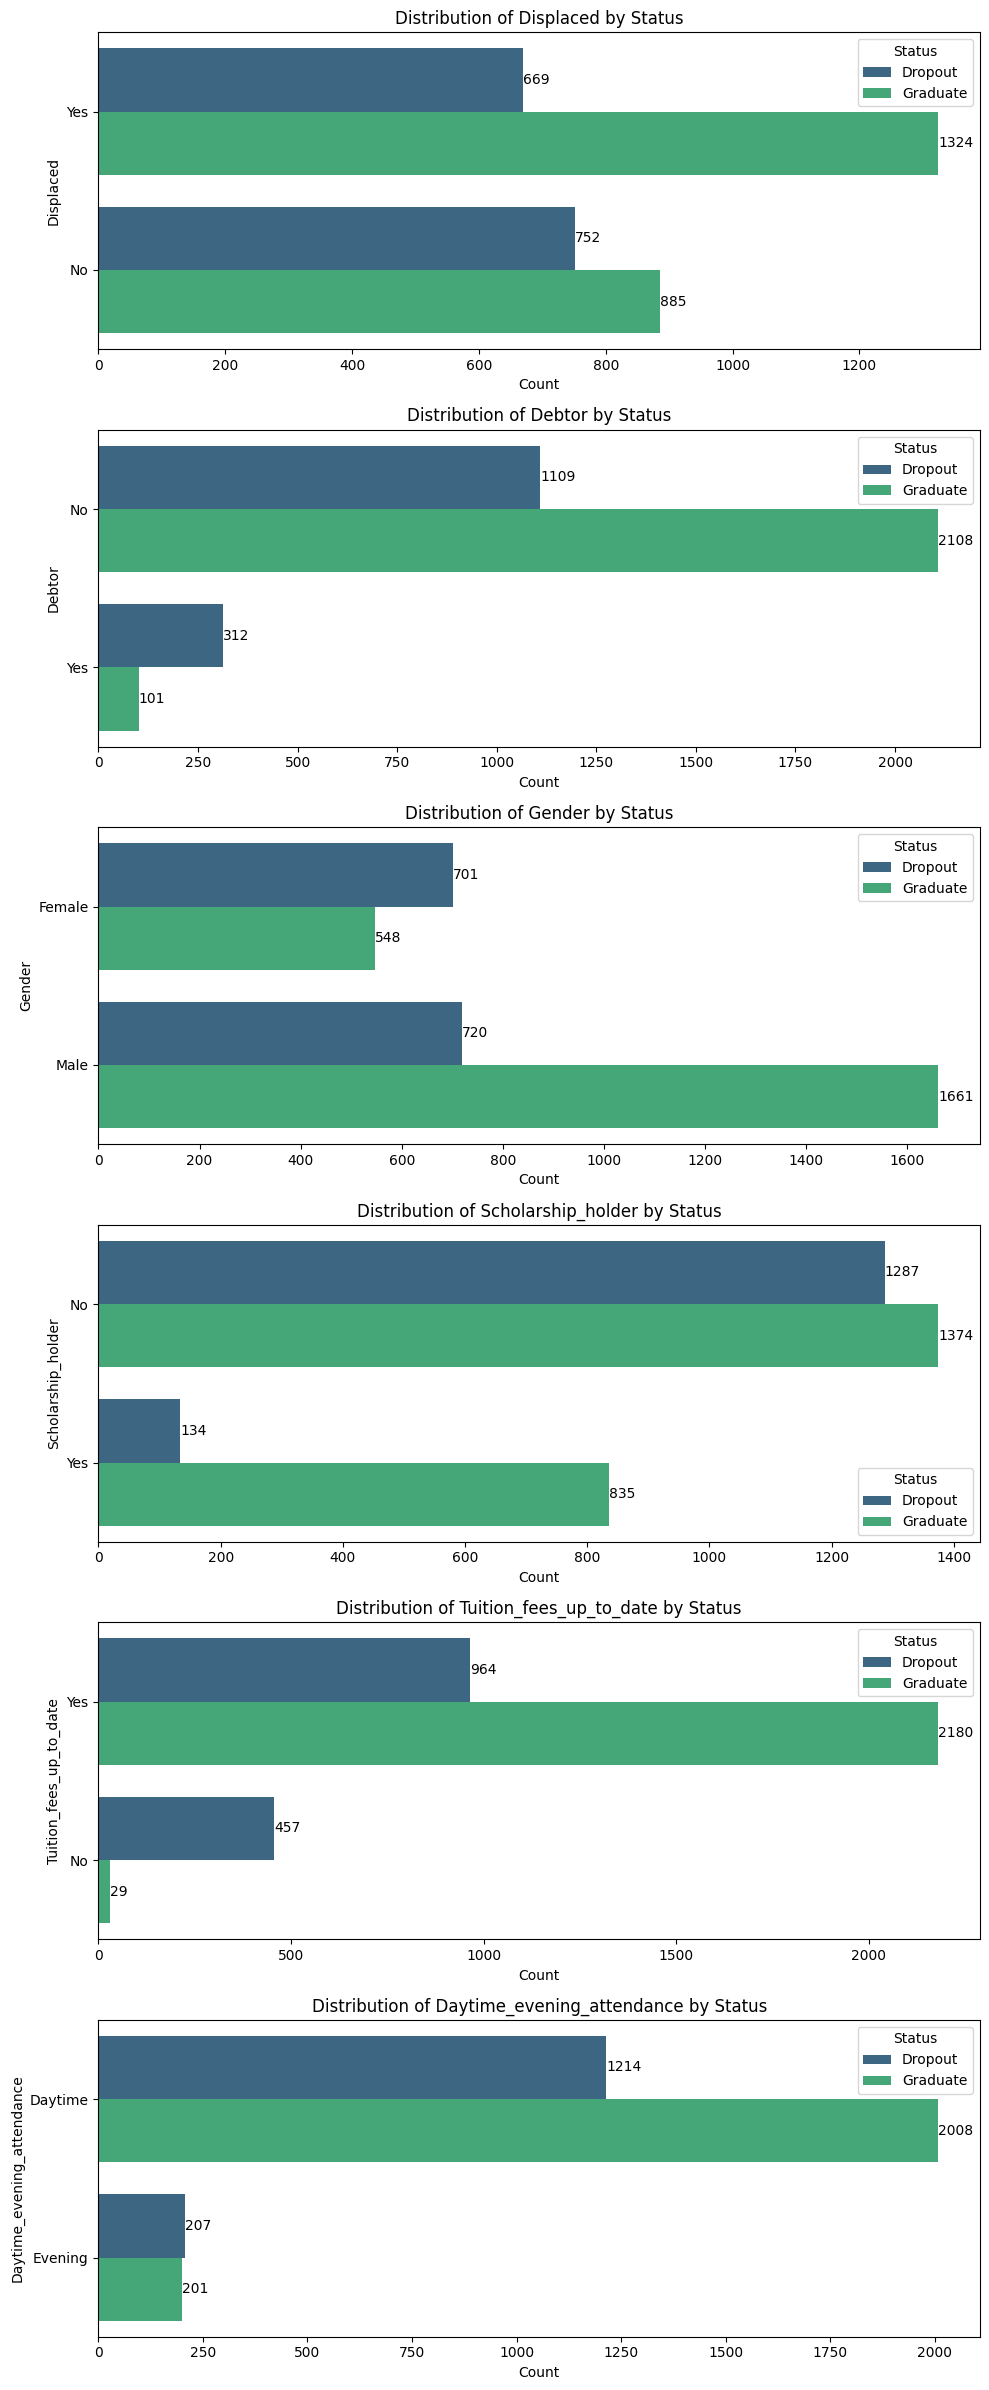

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def categorical_plot(features, education_df, segment_feature=None):
    """
    Membuat plot countplot untuk fitur kategorikal.

    Args:
        features (list): Daftar nama fitur kategorikal yang akan diplot.
        education_df (pd.DataFrame): DataFrame yang berisi data.
        segment_feature (str, optional): Nama fitur untuk segmentasi hue.
                                         Defaultnya adalah None.
    """
    num_features = len(features)
    fig, axes = plt.subplots(num_features, 1, figsize=(10, num_features * 4))

    for i, feature in enumerate(features):
        if segment_feature:
            ax = axes[i] if num_features > 1 else axes
            sns.countplot(data=education_df, y=feature, hue=segment_feature, ax=ax, palette='viridis')
            ax.set_title(f'Distribution of {feature} by {segment_feature}')
            ax.set_xlabel('Count')
            ax.set_ylabel(feature)

            for container in ax.containers:
                ax.bar_label(container, label_type='edge')

        else:
            ax = axes[i] if num_features > 1 else axes
            sns.countplot(data=education_df, y=feature, ax=ax, palette='viridis')
            ax.set_title(f'Distribution of {feature}')
            ax.set_xlabel('Count')
            ax.set_ylabel(feature)

            for container in ax.containers:
                ax.bar_label(container, label_type='edge')


    plt.tight_layout()
    plt.show()

# Contoh penggunaan dengan data Anda
categorical_plot(
    features=[
        'Displaced',
        'Debtor',
        'Gender',
        'Scholarship_holder',
        'Tuition_fees_up_to_date',
        'Daytime_evening_attendance'
    ],
    education_df=education_df,
    segment_feature="Status"
)



> Sel ini mendefinisikan dan menggunakan fungsi categorical_plot untuk membuat bar plot untuk beberapa fitur kategorikal. Plot ini disegmentasi berdasarkan 'Status', memungkinkan kita melihat distribusi setiap kategori dalam kaitannya dengan apakah siswa adalah "Dropout" atau "Graduate".



## Modeling

In [53]:
category_cols = education_df.select_dtypes(exclude=['int32','int64','float32','float64'])
category_cols.head()

,Daytime_evening_attendance,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Status
0,Daytime,Yes,No,Yes,Female,No,Dropout
1,Daytime,Yes,No,No,Female,No,Graduate
2,Daytime,Yes,No,No,Female,No,Dropout
3,Daytime,Yes,No,Yes,Male,No,Graduate
4,Evening,No,No,Yes,Male,No,Graduate




> Sel ini memilih semua kolom dalam DataFrame yang bukan merupakan tipe data numerik (integer atau float) dan menyimpannya dalam variabel category_cols. Fungsi .head() menampilkan beberapa baris pertama dari kolom-kolom kategorikal ini.



In [54]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



# Buat folder model
os.makedirs("model", exist_ok=True)

# ---------------------------
# Encode fitur kategorikal (gunakan encoder terpisah per fitur)
# ---------------------------
features_to_encode = [
    'Daytime_evening_attendance',
    'Displaced',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder'
]

for feature in features_to_encode:
    encoder = LabelEncoder()
    education_df[feature] = encoder.fit_transform(education_df[feature])
    joblib.dump(encoder, f"model/encoder_{feature}.joblib")

# ---------------------------
# Scaling fitur numerik (gunakan scaler terpisah per fitur)
# ---------------------------
features_to_scale = [
    'Admission_grade',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_credited'
]

for feature in features_to_scale:
    scaler = StandardScaler()
    education_df[[feature]] = scaler.fit_transform(education_df[[feature]])
    joblib.dump(scaler, f"model/scaler_{feature}.joblib")

# ---------------------------
# Encode label target
# ---------------------------
target_encoder = LabelEncoder()
education_df['Status'] = target_encoder.fit_transform(education_df['Status'])
joblib.dump(target_encoder, "model/encoder_target.joblib")

# ---------------------------
# Simpan urutan fitur
# ---------------------------
X = education_df.drop(columns=['Status'])
y = education_df['Status']
joblib.dump(list(X.columns), "model/features_used.joblib")

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# ---------------------------
# (Opsional) Tampilkan ukuran data
# ---------------------------
print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (2904, 16)
Test: (726, 16)




> Sel ini melakukan langkah-langkah preprocessing penting untuk pemodelan:
- Membuat folder 'model' untuk menyimpan artefak
-preprocessing dan model.
-Melakukan Label Encoding pada fitur kategorikal dan -menyimpan setiap encoder.
-Melakukan Standard Scaling pada fitur numerik dan -menyimpan setiap scaler.
-Melakukan Label Encoding pada kolom target 'Status' dan menyimpan encoder.
-Memisahkan fitur (X) dan target (y) dan menyimpan daftar nama fitur yang digunakan.
-Membagi data menjadi set pelatihan (X_train, y_train) dan set pengujian (X_test, y_test).
-Mencetak ukuran set pelatihan dan pengujian.



In [55]:
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
joblib.dump(target_encoder, "model/encoder_target.joblib")

['model/encoder_target.joblib']



> Sel ini kembali melakukan Label Encoding pada variabel target 'y'. Jika sel sebelumnya sudah dijalankan, langkah ini redundan. Ini menyimpan encoder untuk variabel target.



Model menggunakan Random forest

In [56]:
# Initialize the Random Forest classifier and define the hyperparameter grid
rf_classifier = RandomForestClassifier(class_weight='balanced')
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Initialize and train GridSearchCV, then make predictions
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
rf_predictions = rf_grid_search.predict(X_test)

# Print best parameters and test accuracy
print("Best parameters:", rf_grid_search.best_params_)
print("The test accuracy score of Random Forest Classifier is", accuracy_score(y_test, rf_predictions))

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
The test accuracy score of Random Forest Classifier is 0.8870523415977961




> Sel ini melakukan pemodelan menggunakan Random Forest Classifier.
- Ini menginisialisasi Random Forest dengan -class_weight='balanced' untuk menangani ketidakseimbangan kelas.
-Ini mendefinisikan grid hyperparameter untuk disetel.
-Ini menggunakan GridSearchCV dengan validasi silang (cv=5) untuk mencari kombinasi hyperparameter terbaik yang memaksimalkan akurasi pada data pelatihan.
-Setelah menemukan parameter terbaik, model dilatih ulang pada seluruh set pelatihan.
-Model yang dilatih kemudian digunakan untuk membuat prediksi pada set pengujian (X_test).
-Terakhir, sel ini mencetak parameter terbaik yang ditemukan oleh GridSearchCV dan akurasi model pada set pengujian.



## Evaluation

Confusion Matrix of Random Forest Classifier:
[[223  54]
 [ 28 421]]


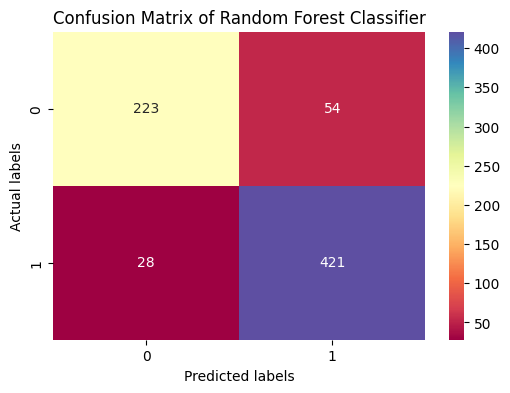

In [57]:
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()



> Sel ini menghitung dan memvisualisasikan confusion matrix untuk prediksi Random Forest pada set pengujian. Confusion matrix menunjukkan jumlah True Positives, True Negatives, False Positives, dan False Negatives, yang penting untuk memahami kinerja model secara lebih rinci daripada sekadar akurasi.



In [58]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, rf_predictions))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       277
           1       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726





> Sel ini mencetak classification report untuk prediksi Random Forest pada set pengujian. Laporan ini mencakup metrik evaluasi utama seperti Precision, Recall, F1-score, dan Support untuk setiap kelas ('Dropout' dan 'Graduate'). Metrik ini memberikan gambaran yang lebih komprehensif tentang kinerja model.



## DEPLOYMENT

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, "model/model_rf.joblib")

['model/model_rf.joblib']



> Sel ini melatih model Random Forest Classifier terakhir menggunakan parameter terbaik yang ditemukan (atau dengan parameter default jika GridSearchCV tidak dijalankan sebelumnya, tetapi di sini tampaknya menggunakan parameter dari sel GridSearchCV). Model dilatih pada seluruh set pelatihan (X_train dan y_train) dan kemudian disimpan ke file model/model_rf.joblib. Model yang disimpan ini dapat digunakan nanti untuk membuat prediksi pada data baru.



In [60]:
import os
import zipfile
from google.colab import files

def zip_and_download(model_dir):
    # buat format dalam zip
    with zipfile.ZipFile(model_dir + ".zip", "w") as zipf:
        for root, _, files_in_dir in os.walk(model_dir):
            for file in files_in_dir:
                zipf.write(os.path.join(root, file))

    # Download file zip
    files.download(model_dir + ".zip")

zip_and_download("model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
education_df.to_csv("education_clean.csv", index=False)

In [62]:
!pip freeze > requirements.txt